In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import warnings
warnings.filterwarnings("ignore")
from skimage.transform import resize

(2215, 1803, 3)


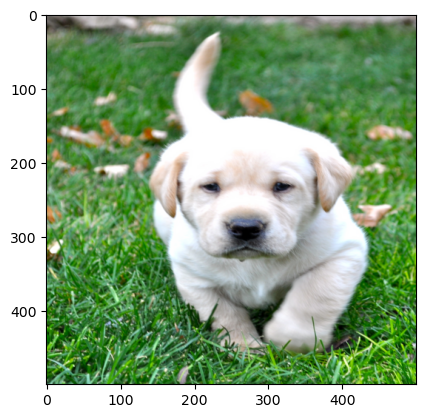

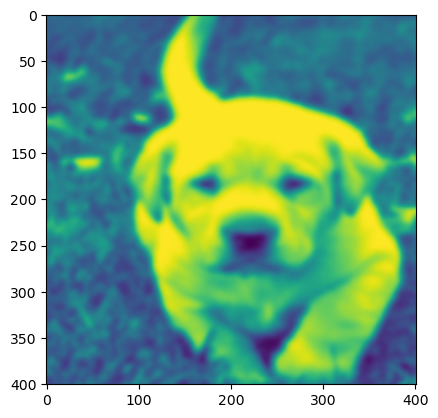

In [23]:
def gaussian_blur(x,kernel_size,var=1):
    m=np.mean(np.arange(kernel_size))
    mean = np.empty((2,1))
    mean.fill(m)

    kernel=np.zeros((kernel_size,kernel_size))

    var_matr=np.array([[var,0],[0,var]])

    for i in range(kernel_size):
        for j in range(kernel_size):
            a=np.array([[i],[j]])
            kernel[i,j] = 1/(2*np.pi*np.linalg.det(np.sqrt(var_matr)))*np.exp(-0.5*(a-mean).T@np.linalg.inv(var_matr)@(a-mean))

    kernel = np.tile(kernel,(x.shape[0],1,1))

    feat_map=np.zeros((x.shape[1]-kernel_size+1,x.shape[2]-kernel_size+1))

    for i in range(x.shape[1]-kernel_size+1):
        for j in range(x.shape[2]-kernel_size+1):
            feat_map[i,j]=np.multiply(x[:,i:i+kernel_size,j:j+kernel_size],kernel).sum()

    return feat_map

x=io.imread("Cute_puppy.jpg")
print(x.shape)
x=resize(x,(500,500))
plt.imshow(x)
plt.show()
x=x.T
x=gaussian_blur(x,kernel_size=100,var=10)
plt.imshow(x.T)
plt.show()